<h1 style="text-align: center;"><font color='green'>Desafío 2 - Rendimiento escolar</font></h1>

## <font color='green'>Descripción</font>

Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos
alumnos que presentan un bajo desempeño académico, medido en el promedio final del año
escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de
los alumnos de dos escuelas para perfilar a los estudiantes.
De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas
asociadas a aspectos ambientales del alumno (de `famrel` a `health`) y ver si éstas se
pueden abstraer en categorías latentes.

## <font color='green'>Descripción de la base de datos</font>
Para responder esta pregunta deben utilizar el archivo `students.csv`.
Las variables que componen la base se detallan a continuación.
- `school`: Escuela del estudiante. (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).
- `sex`: Sexo del estudiante. (binaria: 'F' - Mujer o 'M' - Hombre).
- `age`: Edad del estudiante. (numérica: de 15 a 22).
- `address`: Ubicación de la casa del estudiante. (binaria: 'U' - urbana o 'R' - rural).
- `famsize`: Tamaño de la familia. (binaria: 'LE3' - less or equal to 3 or 'GT3' - greater than 3).
- `Pstatus`: Estado cohabitacional de los padres. (binaria: 'T' - cohabitando juntos o 'A' - viviendo separados).
- `Medu`: Nivel educacional de la madre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- `Fedu`: Nivel educacional del padre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- `Mjob`: Ocupación de la madre. (nominal: 'teacher' profesora, 'health' relacionada a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- `job`: Ocupación del padre (nominal: 'teacher' profesor, 'health' relacionado a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- `reason`: Razón para escoger la escuela (nominal: 'home' cercano a casa, 'reputation' reputación de la escuela, 'course' preferencia de cursos u 'other' otra).
- `guardian`: Apoderado del estudiante (nominal: 'mother' madre, 'father' padre u 'other' otro).
- `traveltime`: Tiempo de viaje entre hogar y colegio. Se debe codificar como:
    - 1 si es menos de 15 min,
    - 2 si es de 15 a 30 min,
    - 3 si es de 30 min. a 1 hora,
    - 4 si es más de 1 hora.
- `studytime`: Horas semanales dedicadas al estudio. Se debe codificar como:
    - 1 si es menos de 2 horas,
    - 2 si es de 2 a 5 horas,
    - 3 si es de 5 a 10 horas,
    - 4 si es más de 10 horas.
- `failures`: Número de clases reprobadas. (numérica: n si 1<=n<3, de lo contrario 4).
- `schoolsup`: Apoyo educacional del colegio. (binaria: si o no).
- `famsup`: Apoyo educacional familiar. (binaria: si o no).
- `paid`: Clases particulares pagadas (matemáticas o portugués) (binaria: sí o no).
- `activities`: Actividades extracurriculares. (binaria: si o no).
- `nursery`: Asistió a guardería infantil. (binaria: si o no).
- `higher`: Desea proseguir estudios superiores (binaria: si o no).
- `internet`: Acceso a internet desde el hogar (binaria: si o no).
- `romantic`: Relación romántica (binaria: si o no).
- `famrel`: Calidad de las relaciones familiares. (numérica: de 1 - muy malas a 5 - excelentes).
- `freetime`: Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho).
- `goout`: Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas).
- `Dalc`: Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto).
- `Walc`: Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto).
- `health`: Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno).
- `absences`: Cantidad de ausencias escolares (numérica: de 0 a 93).
- `G1`: Notas durante el primer semestre (numérica: de 0 a 20). **Este es uno de sus vectores objetivos para el modelo descriptivo**.
- `G2`: Notas durante el segundo semestre (numérica: de 0 a 20). **Este es uno de sus vectores objetivos para el modelo descriptivo**.
- `G3`: Promedio final (numérica: de 0 a 20). **Este es uno de sus vectores objetivos para el modelo descriptivo y el vector a predecir en el modelo predictivo**.

## <font color='green'>Aspectos adicionales a considerar</font>
- La base de datos presenta una serie de anomalías. En la escuela no tienen buenas prácticas sobre cómo ingresar datos, por lo que existen datos perdidos que están registrados bajo tres categorías: nulidade, sem validade, zero. De manera adicional, hay 3 variables numéricas que se registraron como strings, cuya interpretación en `pandas` devuelve una estructura de datos genérica. Finalmente, la base está con un encoding distinto al normal y los delimitadores son distintos.
- Para simplificar el análisis y su posterior inclusión en un modelo predictivo, se sugiere recodificar las variables binarias como 0 y 1. Se recomienda seguir el criterio de asignarle 1 a aquellas categorías minoritarias.
- El procedimiento también debe aplicarse para aquellas variables nominales con más de 2 categorías siguiendo la misma lógica.
- En la parte de modelación descriptiva, se deben generar modelos utilizando todos los predictores por cada una de las notas registradas en `G1`, `G2` y `G3`. - Para la parte de modelación predictiva, se debe generar un modelo para predecir las notas en G3.

## <font color='green'>**Hito 1: Preliminares**</font>

#### **<font color='green'>Entendimiento del problema</font>**

Nuestra misión es poder aportar en el desempeño del estudiantado de una escuela portuguesa. Para esto, se nos pidió poder desarrollar un modelo que nos permita estimar el desempeño del estudiante durante el año (en términos de notas) con el fin de poder hacer gestión sobre aquellos estudiantes que se prediga que van a tener un mal desempeño durante el año. Como nuestro problema tiene que ver con estudiantes y escuela, debemos contar con variables que describan a cada estudiante, variables que estén relacionadas con la escuela y el alumno, y variables relacionadas con el ambiente del estudiante en el que se desempeña.

En cuanto a variables que permitan describir al estudiante, notamos que, si contamos con estas, ya que tenemos registros como el sexo del estudiante, su edad, su ubicación, relación romántica y sus notas propiamente tal.

Por otro lado, en cuanto a variables que tengan que ver con el ambiente del estudiante, si contamos, como lo son el tamaño de la familia, relación actual de los padres, tiempos de viaje del estudiante, horas de estudio, entre otras.

Por último, variables que tengan que ver con la escuela y el estudiante tenemos como tiempo libre fuera de la escuela, apoyo educacional del colegio, numero de clases reprobadas, entre otras. Todas estas variables antes mencionadas, son de relevancia para poder comprender la naturaleza y fenómeno estudiado. 

#### **<font color='green'>Distinción del problema</font>**

Dado que debemos generar un modelo para poder predecir el desempeño académico de los alumnos, en términos de notas, es que nos encontramos con un problema de regresión múltiple. En particular, nos encontramos a priori con 3 variables potenciales a predecir, ya que corresponden a las notas finales de cada alumno, para el primer semestre, segundo semestre y final del curso. No obstante, las dos primeras variables (promedio de notas finales del primer y segundo semestre) solo se ocuparán para realizar un modelo descriptivo, no la implementación de un modelo propiamente tal; por ende, la variable que ocuparemos para predecir e indicar si un alumno tendrá o no un mal desempeño durante el año es la variable `G3` que tiene que ver con el promedio final del curso.

Por ultimo, para determinar qué variables ingresarán al modelo o no, se hará un analisis descriptivo para cada variable. En esta caso, para las variables númericas (como lo son las notas promedio del alumno G1, G2 y G3), se harán tanto histograms como boxplot para ver su distribución. Y para las variables categóricas ocuparemos gráficos de torta para determinar si existen categorias muy cargadas (sesgadas hacia un registro en particular). 

#### **<font color='green'>Justificación de métricas de evaluación</font>**

Como nos encontramos frente a un problema de regresión, debemos ocupar métricas que estén asociadas a problemas de regresión. Las métricas que ocuparemos para evaluar nuestro modelo son las siguientes:

- `R2 ajustado` 
- `MSE`
- `RMSE`

#### **<font color='green'>Librerías a utilizar</font>**

Se utilizarán las principales librerías para el análisis de datos vistas durante el módulo, las cuales son:

- `pandas` y `numpy`: Para la manipulación de datos, junto con la recodificación y el filtrado de estos.
- `statsmodels`: Esta librería nos permite trabajar (en términos econométricos) con modelos lineales, en nuestro caso la regresión múltiple.
- `matplotlib` y `seaborn`: Es una librería que nos permite implementar algunos gráficos para la inspección visual de los datos
- `scikit-learn`: Esta librería es la que contiene los métodos para implementar los modelos requeridos, además de tener las funciones para obtener las métricas de desempeño de los distintos modelos a ocupar.
- `warnings`: Se incluye este módulo para sanitizar el notebook y evitar avisos de depreciación.

#### **<font color='green'>Detalle del proceso de recodificación e ingeniería de atributos</font>**

Para la ingeniería de atributos y recodificación, a priori se trabajará de la siguiente manera:

- `valores perdidos`: como se menciona en los enunciados, existen 3 posibles formas de encontrar datos nulos los cuales se registran a mano, las cuales son `nulidade`, `sem validade`, `zero`. Para resolver este conflicto, usaremos la función `replace` en todo el dataset para reemplazar dichos string por `np.nan`.
- `variables numéricas registradas como string`: dado que existen 3 variables numéricas que se registraron como string lo que procede es identificar primero cuáles son esas 3 variables, y para cada una, quitar todos los caracteres que no son números y finalmente convertir la variable como `int` o `float` según corresponda.
- `variables binarias`: como tenemos muchas variables indicadoras (binarias), se creará una función cuyo objetivo será binarizar con `0` y `1` una lista de variables entregadas por el usuario. Además, se dejará como indicador 1 aquellas categorías que sean mayoritarias. Por otro lado, también se creará una función para aquellas variables que posean más de una categoría para binarizarlas de la misma forma, dejando omitida la categoría minoritaria.

Por otro lado, para aquellas variables que representan algún grado de satisfacción o molestia con alguna situación preguntada (como las variables `Walc`, `Dalc`, entre otras) se intentará obtener los factores latentes y así poder reducir la cantidad de variables con las cuales se ingresarán en el modelo.

## <font color='green'>**Hito 2: Descripción**</font>

Antes de realizar cualquier análisis, importamos todas las librerías necesarias para desarrollar el análisis, junto con la carga del set de datos:

In [144]:
# Importamos las librerías a ocupar y cargamos el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import factor_analyzer as fact
from funciones import graf_pie, porcentaje_null, hist_and_box, binarization, dummies
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score 
import missingno as msno 
import warnings
warnings.simplefilter('ignore')

# Leemos el dataset, y ademas, como en la descripción nos dicen que algunos valores nulos vienen como 'nulidade', 'sem validade' y 'zero', le pasamos directamente este vector al parametro na_values para que los cambie inmediatamente
df = pd.read_csv('students.csv', sep = '|', na_values = ['nulidade','sem validade','zero']).drop(['Unnamed: 0'], axis=1)
display(df.head())
df.shape

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,"""4""",1.0,1.0,"""3""",6.0,5.0,6,6.0
1,GP,F,"""17""",U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,"""3""",1.0,1.0,"""3""",4.0,5.0,5,6.0
2,GP,F,"""15""",U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,"""2""",2.0,3.0,"""3""",10.0,NaN,8,10.0
3,GP,F,"""15""",U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,"""2""",1.0,1.0,"""5""",2.0,15.0,14,15.0
4,GP,F,NaN,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,"""2""",1.0,2.0,"""5""",4.0,6.0,10,10.0


(395, 33)

#### **<font color='green'>Inspección del vector objetivo</font>**

En primer lugar, veremos cómo se distribuye cada una de las notas del primer semestre, segundo semestre y el promedio final:

No handles with labels found to put in legend.


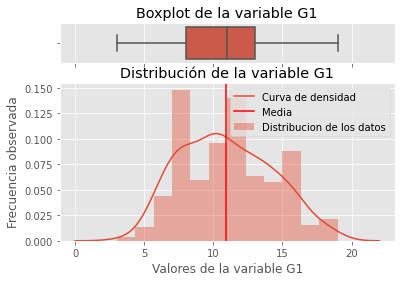

In [93]:
hist_and_box(df, 'G1')

Para las notas del primer semestre, podemos ver que el promedio de las notas esta cercano al valor 11. En base a la forma (distribución) vemos que tiene una especie de forma similar a una normal, pero vemos que tiene olas muy pesadas, ya que se ve como hay una cantidad de valores en los extremos. Por último, en base al boxplot, podemos decir que los datos estan concentrados al valor de de la media.

No handles with labels found to put in legend.


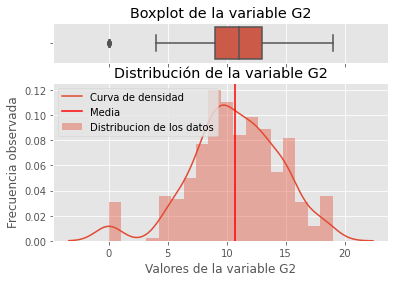

In [94]:
hist_and_box(df, 'G2')

Para las notas del segundo semestre, vemos que claramente su cola izquierda esta muy sesgada, ya que hay hartas notas `0`, esto se puede ver en el boxplot que presenta valores atípicos en el `0`. La forma es un poco más parecida a la de una normal. Por último, al igual que `G1` presenta una media cercana a la nota 11.

No handles with labels found to put in legend.


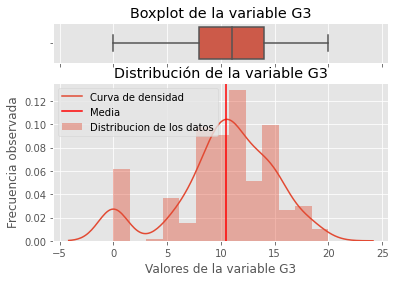

In [95]:
hist_and_box(df, 'G3')

Por último, para el promedio de notas del alumno, vemos que también posee una cola demasiado pesada (sesgo). En cuanto a la forma, no vemos que se asemeje a una curva normal. Y por último, la media del promedio de las notas, esta más cercana a la nota 10.

#### **<font color='green'>Inspección de valores nulos</font>**

Antes de cualquier análisis, debemos inspeccionar los valores nulos. Como mencionamos al principio, al leer la data le pasamos directamente el parámetro `na_values` para que reemplace los `nulidade`, `sem validade` y `zero` por `np.nan`.

Ahora ocuparemos la siguiente función para ver la cantidad y el porcentaje de valores nulos que hay por cada variable, además de su distribución dentro del dataset:

            N_NaN  Porcentaje
schoolsup       8      0.0203
Pstatus         6      0.0152
higher          6      0.0152
nursery         6      0.0152
Mjob            6      0.0152
school          5      0.0127
studytime       5      0.0127
Walc            5      0.0127
goout           5      0.0127
famrel          5      0.0127
activities      5      0.0127
failures        5      0.0127
famsup          5      0.0127
Fedu            5      0.0127
famsize         4      0.0101
guardian        4      0.0101
reason          4      0.0101
G1              4      0.0101
absences        4      0.0101
health          4      0.0101
age             4      0.0101
Dalc            3      0.0076
traveltime      3      0.0076
internet        3      0.0076
Medu            3      0.0076
sex             3      0.0076
G3              3      0.0076
romantic        2      0.0051
freetime        2      0.0051
address         2      0.0051
paid            1      0.0025
Fjob            0      0.0000
G2        

<AxesSubplot:>

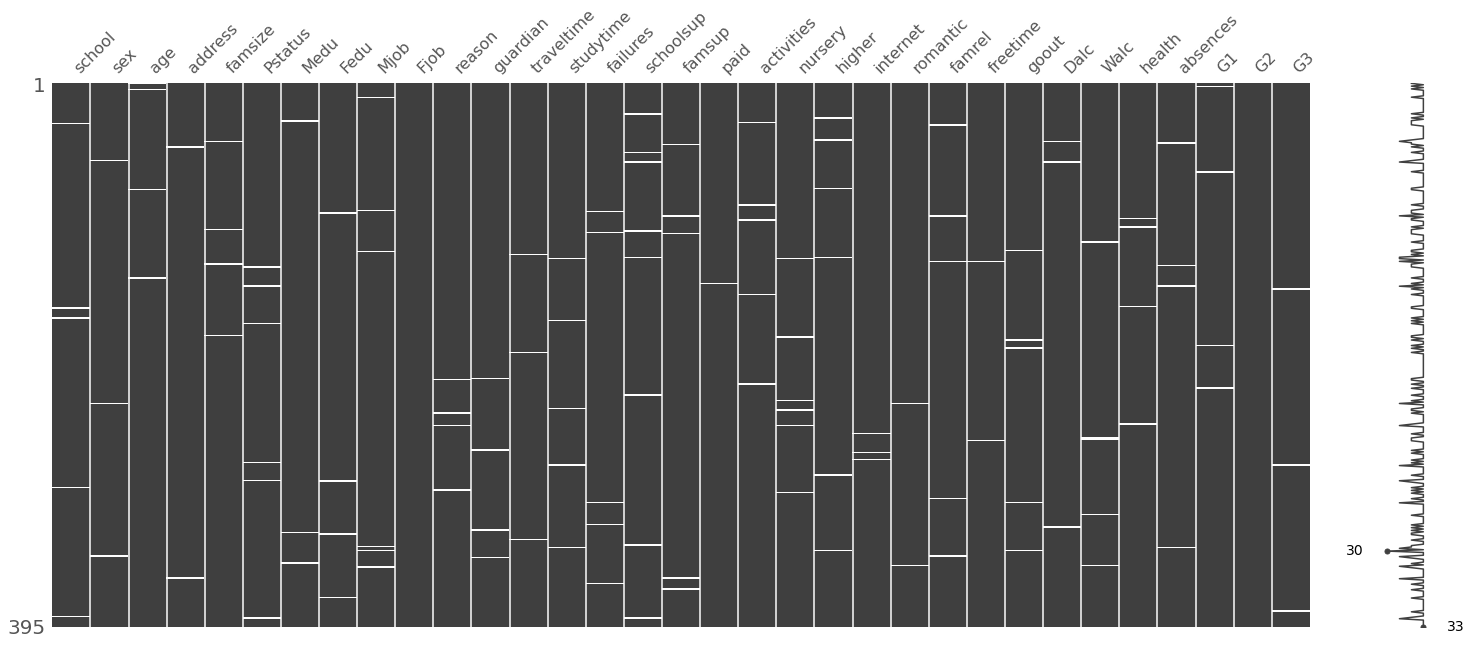

In [96]:
porcentaje_null(df)
msno.matrix(df)

Se puede ver que las únicas columnas que no presentan valores perdidos son solo `Fjob` y `G2`, todas las demás variables presentan a lo menos 1 valor perdido. En términos de porcentaje, es prácticamente nada los valores perdidos, por lo que nuestro plan de acción será eliminar todas las filas que presenten algún valor NaN para así ocupar todas las variables. Correremos nuevamente la función de porcentajes para corroborar que no hay más valores NaN.

In [97]:
df = df.dropna()
porcentaje_null(df)

            N_NaN  Porcentaje
school          0         0.0
paid            0         0.0
G2              0         0.0
G1              0         0.0
absences        0         0.0
health          0         0.0
Walc            0         0.0
Dalc            0         0.0
goout           0         0.0
freetime        0         0.0
famrel          0         0.0
romantic        0         0.0
internet        0         0.0
higher          0         0.0
nursery         0         0.0
activities      0         0.0
famsup          0         0.0
sex             0         0.0
schoolsup       0         0.0
failures        0         0.0
studytime       0         0.0
traveltime      0         0.0
guardian        0         0.0
reason          0         0.0
Fjob            0         0.0
Mjob            0         0.0
Fedu            0         0.0
Medu            0         0.0
Pstatus         0         0.0
famsize         0         0.0
address         0         0.0
age             0         0.0
G3        

#### **<font color='green'>Inspección visual de las variables</font>**

En primer lugar, en la parte de *aspectos adicionales a considerar* nos mencionan que hay 3 variables que deben ser numéricas, pero que fueron mal ingresadas, por lo que ahora son string. En una inspección rápida, las e variables mencionadas son `age`, `goout` y `health`; además, nos damos cuenta que los números poseen comillas dobles `'"'`, por lo que para las 3 variables debemos reemplazar dicho carácter y luego transformar como un float:

In [98]:
df['age'] = df['age'].apply(lambda x: str(x).replace('"','')).astype(float)
df['goout'] = df['goout'].apply(lambda x: str(x).replace('"','')).astype(object)
df['health'] = df['health'].apply(lambda x: str(x).replace('"','')).astype(object)
df[['age', 'goout', 'health']].dtypes

age       float64
goout      object
health     object
dtype: object

Como vemos, las variables fueron exitosamente convertidas a su tipo original. Por otro lado, nos hemos dado cuenta que hay algunas variables que si bien su naturaleza es categórica, se leyeron como tipo numérico, lo cual no es muy conveniente a la hora de analizar dicha variable. haremos una inspección de estas variables:

In [99]:
df.select_dtypes(include=np.number).dtypes

age           float64
Medu          float64
Fedu          float64
traveltime    float64
studytime     float64
failures      float64
famrel        float64
freetime      float64
Dalc          float64
Walc          float64
absences      float64
G1            float64
G2              int64
G3            float64
dtype: object

Como vemos, muchas de estas variables con categorías, por lo que debemos reconvertirlas, como es el caso de `Medu`, `Fedu`, `traveltime`, `failures` y `studytime`. Si bien, las variables `famrel`, `freetime`, `Dalc` y `Walc` su naturaleza es categórica, las dejaremos como variables numéricas dado que queremos abstraer categorías latentes de ellas junto con otro grupo de variables más. Por lo tanto, le cambiaremos el tipo a las variables que corresponden:

In [100]:
df[['Medu', 'Fedu', 'traveltime', 'failures', 'studytime']] = df[['Medu', 'Fedu', 'traveltime', 'failures', 'studytime']].astype(int).astype(object)

Para inspeccionar las variables, comenzaremos con las variables categóricas. Dado que son demasiadas para ir viéndolas una por una, se realizó el siguiente código para graficar todo en la misma salida, con el fin de ver todas a la vez y lograr obtener conclusiones más ágilmente:

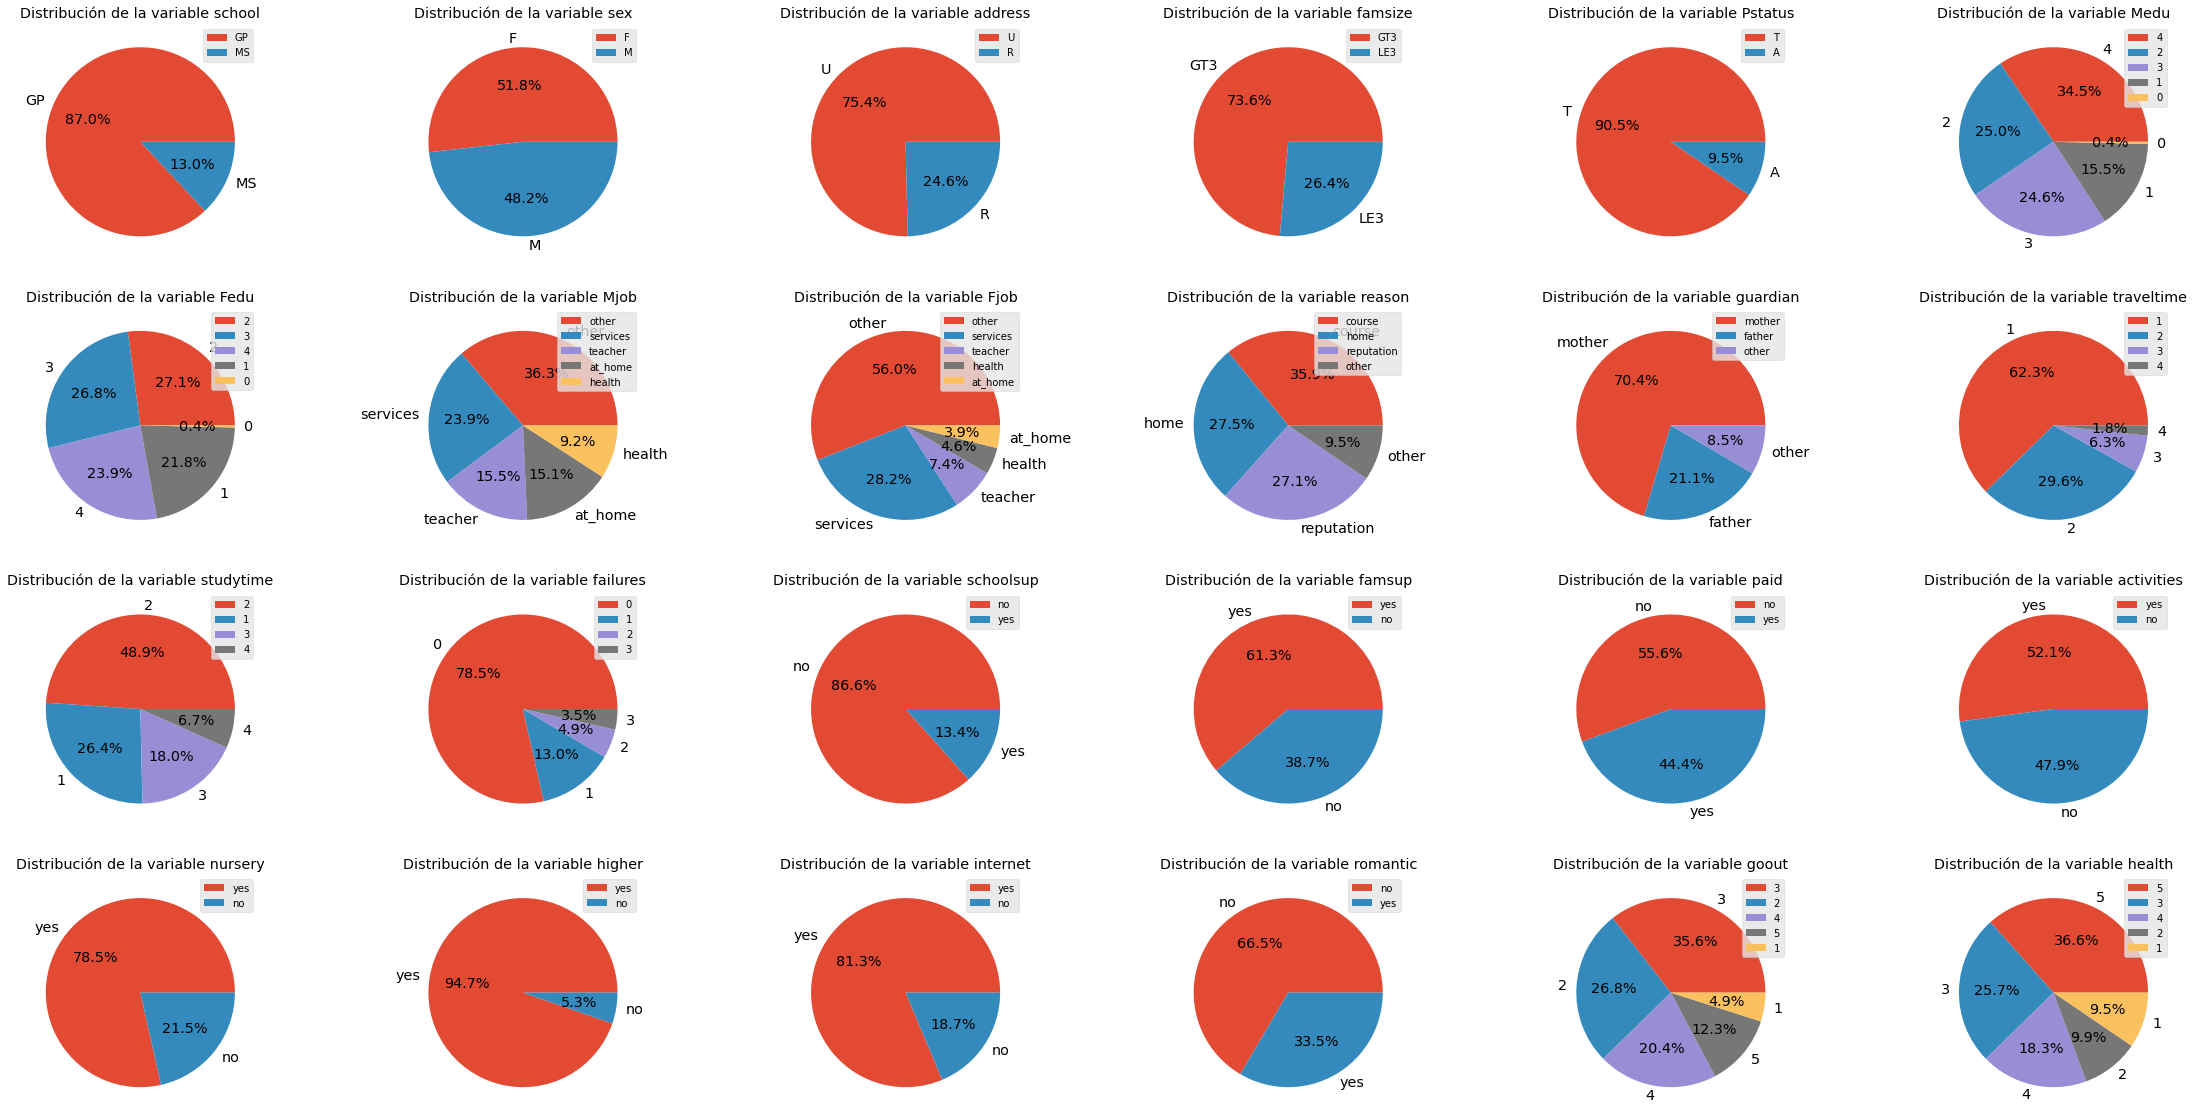

In [101]:
f, a = plt.subplots(4,6, figsize=(33,10))
i = -1
columnas = df.select_dtypes(object).columns
for row in range(4):
    for colum in range(6):
        i+= 1
        df_pie = df[columnas[i]].value_counts().to_frame()
        df_pie[columnas[i]].plot(kind='pie', title=f"Distribución de la variable {columnas[i]}", legend=True, ylabel='', autopct = '%.1f%%', ax=a[row, colum], figsize=(40,20), textprops={'size': 'x-large'})

Rápidamente, podemos apreciar lo siguiente:

- Las siguientes variables presentan homogeneidad en sus categorías, por lo que no hay razón para removerlas y no considerarlas como variables predictoras:
    - `sex`
    - `Medu`: en esta variable la categoría 0 solo tiene un 0,4% de los valores, por lo que se agrupará a otra categoría, ya que, si no se considera ese valor para entrenar, a futuro no podremos predecir la nota final de un alumno que venga con esta categoría.
    - `Fedu`: al igual que Medu, esta variable tiene una categoría 0 equivalente al 0,4% de la data, por lo que se agrupará a otra categoría, ya que, si no se considera ese valor para entrenar, a futuro no podremos predecir la nota final de un alumno que venga con esta categoría.
    - `Mjob`
    - `reason`
    - `famsup `
    - `paid`
    - `activities`
    - `goout`
    - `health`
- Por el contrario, las siguientes variables presentan un alto sesgo en sus categorías, ya que 1 de sus categorías está demasiado cargada, por lo que no la hace una buena variable para predecir, por lo que no serán consideradas para el modelo:
    - `school`
    - `address`
    - `famsize`
    - `Pstatus`
    - `guardian`
    - `failures`
    - `schoolsup`
    - `nursery`
    - `higher`
    - `internet`
- Por último, las restantes variables, podríamos decir que están justo en el límite de decidir si entra o no al modelo, por lo que, para decidir, se ocupara el razonamiento lógico si puede ser o no una variable influyente:
    - `Fjob`: el trabajo del padre no debería ser un factor influyente en su rendimiento según la experiencia de la vida, por lo que no entrará al modelo.
    - `traveltime`: el tiempo de viaje, en base a mi experiencia, no debería ser un factor determinante a la hora del rendimiento escolar, por lo que no se considerará en el modelo.
    - `studytime`: el tiempo de estudio que dedica un estudiante debería ser un factor importante a la hora del rendimiento escolar, por lo que esta variable ingresará al modelo.
    - `romantic`: una relación amorosa, si puede ser una causa de que un alumno baje su rendimiento académico dado que dedica mucho tiempo a la relación, por lo que si pudiese ser un factor determinante a la hora de predecir, por lo que si se considerará y entrará al modelo.


De las variables que presentan un alto sesgo, serán eliminadas del modelo:

In [102]:
delete_columns = ['school'
                ,'address'
                ,'famsize'
                ,'Pstatus'
                ,'guardian'
                ,'failures'
                ,'schoolsup'
                ,'nursery'
                ,'higher'
                ,'internet'
                ,'Fjob'
]

df = df.drop(delete_columns, axis=1)
df.head()

,sex,age,Medu,Fedu,Mjob,reason,traveltime,studytime,famsup,paid,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,F,17.0,1,1,at_home,course,1,2,yes,no,...,5.0,3.0,3,1.0,1.0,3,4.0,5.0,5,6.0
3,F,15.0,4,2,health,home,1,3,yes,yes,...,3.0,2.0,2,1.0,1.0,5,2.0,15.0,14,15.0
5,M,16.0,4,3,services,reputation,1,2,yes,yes,...,5.0,4.0,2,1.0,2.0,5,10.0,15.0,15,15.0
6,M,16.0,2,2,other,home,1,2,no,no,...,4.0,4.0,4,1.0,1.0,3,0.0,12.0,12,11.0
7,F,17.0,4,4,other,home,2,2,yes,no,...,4.0,1.0,4,1.0,1.0,1,6.0,6.0,5,6.0


Como mencionamos, para las variables `Medu` y `Fedu` se añadirá la categoría 0 dentro de la categoría 1, quedando la categoría 1 como nivel educación nulo, o menor y igual a 4to básico. 

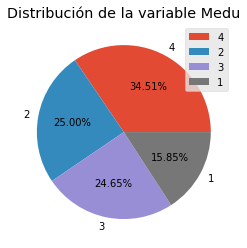

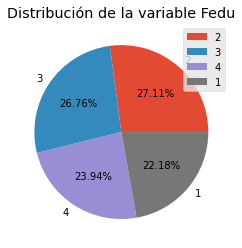

In [103]:
df[['Medu', 'Fedu']] = df[['Medu', 'Fedu']].replace(0,1)

for col in df[['Medu', 'Fedu']]:

    graf_pie(df, col)

#### **<font color='green'>preprocesamiento y recodificación de las variables</font>**

**<font color='green'>Analisis Factorial</font>**

Antes de recodificar las demás variables, vamos a abstraer las categorías latentes tal como nos sugiere la psicopedagoga. Primero, veremos las respuestas promedio de cada batería de preguntas.

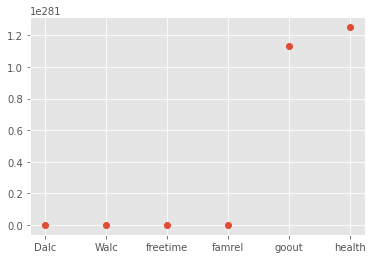

In [104]:
plt.style.use('ggplot')
col_preguntas = ['famrel', 'freetime' , 'goout', 'Dalc', 'Walc', 'health']
df_preguntas = df[col_preguntas]
plt.plot(df_preguntas.mean().sort_values(), 'o')

Se puede observar que tanto las variables `goout` y `health` (salidas con amigos y estado de salud actual) tiene un puntaje promedio mucho más alto que el resto de las baterías de preguntas. Ahora analizaremos si existe alguna correlación entre estas baterías de preguntas:

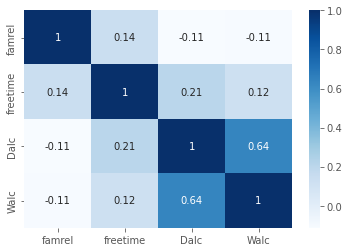

In [105]:
sns.heatmap(df_preguntas.corr(), cmap='Blues', annot = True);

Podemos observar que solo las variables `Walc` y `Dalc` presentan un grado de correlación, por lo que a priori no podríamos realizar el análisis factorial ya que esperamos que exista correlación entre variables. Dicho esto, estudiaremos si es posible o no realizar un análisis factorial con esta batería de preguntas. Para esto, utilizaremos la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. 

In [106]:
# Nos aseguramos que sean el tipo correcto convirtiendo todo el dataframe como int
df_preguntas = df_preguntas.astype(float)

estadistico_corte, pvalor = fact.calculate_bartlett_sphericity(df_preguntas)
assert pvalor < 0.05

In [107]:
kmos_individuales, kmo_general = fact.calculate_kmo(df_preguntas)
assert kmo_general > 0.7

AssertionError: 

Como podemos observar, la prueba de esfericidad de Barlett pasó, pero el cálculo del KMO_general y KMO_inidividual no fueron adecuados. Inspeccionaremos el valor del KMO general e individuales:

In [108]:
print(f'Valor KMO general: {kmo_general}')
print(f'Valores KMO individuales: {kmos_individuales}')

Valor KMO general: 0.5784452766434512
Valores KMO individuales: [0.50349705 0.57864427 0.61850565 0.58835138 0.55715052 0.59436059]


Notamos que los valores están muy por debajo del 0.7 esperamos. Por lo tanto, no se realizará el análisis factorial ya que la batería de preguntas no es idónea.

**<font color='green'>Recodificacion</font>**

Procedemos a binarizar las variables del dataframe, siguiendo la recomendación de dejar la clase minoritaria como 1. Para esto se creó una función que binariza la variable en 0 y 1 dejando como 1 la clase minoritaria:

In [109]:
column_binarize = ['sex', 'famsup', 'paid', 'activities', 'romantic']

for col in column_binarize:
    
    df = binarization(df, col)

df.head()

,sex,age,Medu,Fedu,Mjob,reason,traveltime,studytime,famsup,paid,...,health,absences,G1,G2,G3,sex_bin,famsup_bin,paid_bin,activities_bin,romantic_bin
1,F,17.0,1,1,at_home,course,1,2,yes,no,...,3,4.0,5.0,5,6.0,0,0,0,1,0
3,F,15.0,4,2,health,home,1,3,yes,yes,...,5,2.0,15.0,14,15.0,0,0,1,0,1
5,M,16.0,4,3,services,reputation,1,2,yes,yes,...,5,10.0,15.0,15,15.0,1,0,1,0,0
6,M,16.0,2,2,other,home,1,2,no,no,...,3,0.0,12.0,12,11.0,1,1,0,1,0
7,F,17.0,4,4,other,home,2,2,yes,no,...,1,6.0,6.0,5,6.0,0,0,0,1,0


Ahora, para las variables nominales, se ocupará la función creada dummies para realizar el get_dammy sobre cada variable, eliminando como columna la que tenga la clase minoritaria

In [110]:
colums_dummies = ['Mjob', 'reason']

df_model = dummies(df,colums_dummies)

# Ahora eliminamos las variables que se ocuparon para hacer las dummies y para realizar la binarizacion
df_model = df_model.drop(colums_dummies+column_binarize, axis=1)
df_model

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,paid_bin,activities_bin,romantic_bin,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_reputation
1,17.0,1,1,1,2,5.0,3.0,3,1.0,1.0,...,0,1,0,1,0,0,0,1,0,0
3,15.0,4,2,1,3,3.0,2.0,2,1.0,1.0,...,1,0,1,0,0,0,0,0,1,0
5,16.0,4,3,1,2,5.0,4.0,2,1.0,2.0,...,1,0,0,0,0,1,0,0,0,1
6,16.0,2,2,1,2,4.0,4.0,4,1.0,1.0,...,0,1,0,0,1,0,0,0,1,0
7,17.0,4,4,2,2,4.0,1.0,4,1.0,1.0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2,2,1,2,5.0,5.0,4,4.0,5.0,...,1,1,0,0,0,1,0,1,0,0
391,17.0,3,1,2,1,2.0,4.0,5,3.0,4.0,...,0,1,0,0,0,1,0,1,0,0
392,21.0,1,1,1,1,5.0,5.0,3,3.0,3.0,...,0,1,0,0,1,0,0,1,0,0
393,18.0,3,2,3,1,4.0,4.0,1,3.0,4.0,...,0,1,0,0,0,1,0,1,0,0


Por lo tanto, estamos listos para modelar.

## <font color='green'>**Hito 3: Modelación Descriptiva**</font>

Antes de modelar, ceteamos el tipo de datos de algunas variables que quedaron como tipo objeto:

In [111]:
df_model[['traveltime','studytime','goout','health']] = df_model[['traveltime','studytime', 'goout','health']].astype(int)

Ahora, implementamos los modelos descriptivos para los 3 vectores objetivo `G1`, `G2` y `G3`

**<font color='green'>Modelo descriptivo para G1</font>**

In [112]:
model_g1 = smf.ols(f'G1 ~ {" + ".join(df_model.columns.drop(["G1","G2","G3"]))}', data=df_model).fit()
model_g1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.140    
Dependent Variable: G1               AIC:                1463.3901
Date:               2022-11-18 18:37 BIC:                1554.6144
No. Observations:   284              Log-Likelihood:     -706.70  
Df Model:           24               F-statistic:        2.912    
Df Residuals:       259              Prob (F-statistic): 1.47e-05 
R-squared:          0.213            Scale:              9.3091   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept           8.9759   3.0515  2.9415 0.0036  2.9670 14.9848
age                 0.0604   0.1546  0.3909 0.6962 -0.2440  0.3649
Medu                0.2604   0.2789  0.9336 0.3514 -0.2888  0.8096
Fedu                0.4287   0.2239  1.9147 0.0566 -0.0122  0.8697
traveltime         -0.0448   0.2777 -0.1612 0.8720 -0.5916  0.5021
studytime           0.6559   0.2478  2.6472 0.0086  0.1680  1.1439
famrel              0.1791   0.2174  0.8241 0.4107 -0.2489  0.6072
freetime            0.3557   0.1991  1.7867 0.0752 -0.0363  0.7476
goout              -0.8289   0.2037 -4.0691 0.0001 -1.2300 -0.4278
Dalc               -0.0416   0.2863 -0.1453 0.8846 -0.6053  0.5221
Walc                0.0393   0.2120  0.1852 0.8533 -0.3782  0.4567
health             -0.3270   0.1458 -2.2429 0.0257 -0.6141 -0.0399
absences           -0.0129   0.0242 -0.5325 0.5948 -0.0606  0.0348
sex_bin             0.8728   0.4330  2.0157 0.0449  0.0202  1.7255
famsup_bin          1.2185   0.4175  2.9190 0.0038  0.3965  2.0406
paid_bin            0.1217   0.4048  0.3006 0.7640 -0.6754  0.9187
activities_bin      0.5785   0.3731  1.5504 0.1223 -0.1562  1.3131
romantic_bin       -0.0919   0.4036 -0.2276 0.8201 -0.8867  0.7029
Mjob_at_home       -1.1075   0.9096 -1.2175 0.2245 -2.8987  0.6837
Mjob_other         -1.7501   0.7611 -2.2996 0.0223 -3.2488 -0.2514
Mjob_services      -0.6428   0.7407 -0.8678 0.3863 -2.1014  0.8158
Mjob_teacher       -1.6446   0.7984 -2.0599 0.0404 -3.2167 -0.0724
reason_course      -0.4829   0.6808 -0.7093 0.4788 -1.8236  0.8577
reason_home        -0.1075   0.7099 -0.1515 0.8797 -1.5055  1.2904
reason_reputation   0.1246   0.7128  0.1747 0.8614 -1.2791  1.5282
------------------------------------------------------------------
Omnibus:               6.443        Durbin-Watson:           1.990
Prob(Omnibus):         0.040        Jarque-Bera (JB):        4.696
Skew:                  0.188        Prob(JB):                0.096
Kurtosis:              2.495        Condition No.:           339  
==================================================================

"""

Claramente, vemos bastantes variables las cuales no son significativas para el modelo, como `age`, `Dalc`, por nombrar algunas. Por ende, procederemos a crear un segundo modelo descriptivo solo con variables que sean estadísticamente significativas. Para esto, ocuparemos todas aquellas que tengan un p-valor menor a 0.05

In [113]:
tbl_g1 = model_g1.summary2().tables[1]
variables_sign = tbl_g1[tbl_g1['P>|t|'] < 0.05].index.drop('Intercept')  # OBTENEMOS EL NOMBRE DE LAS VARIABLES QUE SON SIGNIFICATIVAS

model_g1_depurado = smf.ols(f'G1 ~ {" + ".join(variables_sign)}', data=df_model).fit()
model_g1_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.114    
Dependent Variable: G1               AIC:                1455.7493
Date:               2022-11-18 18:37 BIC:                1484.9411
No. Observations:   284              Log-Likelihood:     -719.87  
Df Model:           7                F-statistic:        6.202    
Df Residuals:       276              Prob (F-statistic): 9.31e-07 
R-squared:          0.136            Scale:              9.5854   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      12.5704    1.0157  12.3765  0.0000  10.5709  14.5698
studytime       0.6774    0.2358   2.8731  0.0044   0.2132   1.1415
goout          -0.6940    0.1725  -4.0237  0.0001  -1.0335  -0.3545
health         -0.3382    0.1421  -2.3794  0.0180  -0.6180  -0.0584
sex_bin         1.0609    0.4068   2.6078  0.0096   0.2600   1.8618
famsup_bin      0.8107    0.3912   2.0722  0.0392   0.0405   1.5809
Mjob_other     -1.1936    0.4105  -2.9075  0.0039  -2.0018  -0.3855
Mjob_teacher   -0.3298    0.5481  -0.6017  0.5479  -1.4087   0.7491
------------------------------------------------------------------
Omnibus:               9.270        Durbin-Watson:           1.944
Prob(Omnibus):         0.010        Jarque-Bera (JB):        6.166
Skew:                  0.218        Prob(JB):                0.046
Kurtosis:              2.424        Condition No.:           31   
==================================================================

"""

Vemos como aún hay algunas variables que no son estadísticamente significativas nuevamente, como es el caso de las variables `famsup_bin` y `Mjob_teacher`. Por lo que haremos un 3er modelo descriptivo sin considerar las dos variables mencionadas:

In [114]:
model_g1_depurado2 = smf.ols(f'G1 ~ {" + ".join(variables_sign.drop("Mjob_teacher"))}', data=df_model).fit()
model_g1_depurado2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.116    
Dependent Variable: G1               AIC:                1454.1216
Date:               2022-11-18 18:37 BIC:                1479.6645
No. Observations:   284              Log-Likelihood:     -720.06  
Df Model:           6                F-statistic:        7.192    
Df Residuals:       277              Prob (F-statistic): 3.82e-07 
R-squared:          0.135            Scale:              9.5633   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      12.4798    1.0033  12.4389  0.0000  10.5048  14.4549
studytime       0.6701    0.2352   2.8493  0.0047   0.2071   1.1330
goout          -0.6846    0.1716  -3.9903  0.0001  -1.0224  -0.3469
health         -0.3348    0.1419  -2.3598  0.0190  -0.6140  -0.0555
sex_bin         1.0162    0.3995   2.5436  0.0115   0.2297   1.8026
famsup_bin      0.8221    0.3903   2.1063  0.0361   0.0538   1.5905
Mjob_other     -1.1105    0.3861  -2.8760  0.0043  -1.8705  -0.3504
------------------------------------------------------------------
Omnibus:               9.830        Durbin-Watson:           1.949
Prob(Omnibus):         0.007        Jarque-Bera (JB):        6.373
Skew:                  0.218        Prob(JB):                0.041
Kurtosis:              2.410        Condition No.:           31   
==================================================================

"""

Finalmente, hemos llegado a un modelo descriptivo donde todas las variables son estadísticamente significativas al 5%. Ahora, lo que haremos es comparar cada uno de los modelos realizados según sus métricas de ajuste:

In [116]:
tbl_g1_m = model_g1.summary2().tables[0]                   # TABLAS CON LAS MÉTRICAS DEL MODELO G1 FULL
tbl_g1_dep_m = model_g1_depurado.summary2().tables[0]      # TABLAS CON LAS MÉTRICAS DEL MODELO G1 DEPURADO
tbl_g1_dep2_m = model_g1_depurado2.summary2().tables[0]    # TABLAS CON LAS MÉTRICAS DEL MODELO G1 DEPURADO 2


g1_full = tbl_g1_m.iloc[0:4,2:4].rename(columns = {2: 'index', 3:'g1_full'}).set_index('index')        # METRICAS DEL MODELO FULL
g1_dep = tbl_g1_dep_m.iloc[0:4,2:4].rename(columns = {2: 'index', 3:'g1_dep'}).set_index('index')      # METRICAS DEL MODELO DEPURADO
g1_dep2 = tbl_g1_dep2_m.iloc[0:4,2:4].rename(columns = {2: 'index', 3:'g1_dep2'}).set_index('index')   # METRICAS DEL MODELO DEPURADO 2

pd.concat([g1_full, g1_dep, g1_dep2], axis = 1)

,g1_full,g1_dep,g1_dep2
index,,,
Adj. R-squared:,0.140,0.114,0.116
AIC:,1463.3901,1455.7493,1454.1216
BIC:,1554.6144,1484.9411,1479.6645
Log-Likelihood:,-706.70,-719.87,-720.06


vemos que en general, tenemos métricas muy similares, aunque el modelo full tiene mejores métricas que en comparación con las demás. Ahora, en términos de parsimonia, el mejor modelo descriptivo sería el que se depuro por segunda vez, ya que tiene mucho menos variables que las otras dos y en términos de métricas poseen valores muy similares. Por lo tanto, de quedarnos con algún modelo, lo haríamos con el último modelo descriptivo implementado.

Ahora, veremos que variables influyen (significativamente) de forma positiva en el modelo escogido:

In [119]:
tbl_model_descriptivo = model_g1_depurado2.summary2().tables[1]
tbl_model_descriptivo[tbl_model_descriptivo['Coef.'] > 0]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,12.479818,1.003293,12.438857,1.612930e-28,10.504770,14.454865
studytime,0.670089,0.235176,2.849305,4.710288e-03,0.207129,1.133048
sex_bin,1.016180,0.399512,2.543552,1.151701e-02,0.229714,1.802646
famsup_bin,0.822123,0.390315,2.106305,3.607744e-02,0.053762,1.590484


Ahora, veremos que variables influyen (significativamente) de forma negativa en el modelo escogido:

In [120]:
tbl_model_descriptivo[tbl_model_descriptivo['Coef.'] < 0]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
goout,-0.684610,0.171568,-3.990302,0.000085,-1.022354,-0.346866
health,-0.334772,0.141864,-2.359811,0.018978,-0.614040,-0.055504
Mjob_other,-1.110451,0.386114,-2.875967,0.004341,-1.870541,-0.350361


**<font color='green'>Modelo descriptivo para G2</font>**

In [121]:
model_g2 = smf.ols(f'G2 ~ {" + ".join(df_model.columns.drop(["G1","G2","G3"]))}', data=df_model).fit()
model_g2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.147    
Dependent Variable: G2               AIC:                1541.3999
Date:               2022-11-18 18:52 BIC:                1632.6242
No. Observations:   284              Log-Likelihood:     -745.70  
Df Model:           24               F-statistic:        3.027    
Df Residuals:       259              Prob (F-statistic): 6.87e-06 
R-squared:          0.219            Scale:              12.252   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          14.8348   3.5007  4.2376 0.0000  7.9413 21.7284
age                -0.1327   0.1774 -0.7482 0.4550 -0.4820  0.2166
Medu                0.3801   0.3200  1.1880 0.2359 -0.2499  1.0102
Fedu                0.1575   0.2569  0.6133 0.5402 -0.3483  0.6634
traveltime         -0.2980   0.3186 -0.9352 0.3505 -0.9253  0.3294
studytime           0.5718   0.2843  2.0115 0.0453  0.0120  1.1315
famrel              0.0730   0.2494  0.2929 0.7698 -0.4180  0.5641
freetime            0.3054   0.2284  1.3371 0.1823 -0.1443  0.7550
goout              -1.0055   0.2337 -4.3025 0.0000 -1.4657 -0.5453
Dalc               -0.1106   0.3284 -0.3367 0.7366 -0.7573  0.5361
Walc                0.2378   0.2432  0.9775 0.3292 -0.2412  0.7167
health             -0.4673   0.1673 -2.7939 0.0056 -0.7966 -0.1379
absences           -0.0139   0.0278 -0.4994 0.6179 -0.0686  0.0408
sex_bin             0.9734   0.4967  1.9595 0.0511 -0.0048  1.9515
famsup_bin          1.2778   0.4789  2.6682 0.0081  0.3348  2.2209
paid_bin            0.6885   0.4644  1.4827 0.1394 -0.2259  1.6029
activities_bin      0.3422   0.4280  0.7995 0.4247 -0.5006  1.1850
romantic_bin       -0.7081   0.4630 -1.5292 0.1274 -1.6199  0.2037
Mjob_at_home       -1.7785   1.0435 -1.7043 0.0895 -3.8334  0.2764
Mjob_other         -1.6870   0.8731 -1.9322 0.0544 -3.4063  0.0323
Mjob_services      -0.8288   0.8498 -0.9753 0.3303 -2.5022  0.8445
Mjob_teacher       -1.9858   0.9159 -2.1682 0.0311 -3.7894 -0.1823
reason_course      -1.1773   0.7811 -1.5074 0.1329 -2.7154  0.3607
reason_home        -0.5733   0.8144 -0.7039 0.4821 -2.1770  1.0305
reason_reputation  -0.5448   0.8178 -0.6662 0.5059 -2.1550  1.0655
------------------------------------------------------------------
Omnibus:              7.250         Durbin-Watson:           1.835
Prob(Omnibus):        0.027         Jarque-Bera (JB):        7.364
Skew:                 -0.312        Prob(JB):                0.025
Kurtosis:             3.482         Condition No.:           339  
==================================================================

"""

Claramente, vemos bastantes variables las cuales no son significativas para el modelo, como `famrel`, `absences`, por nombrar algunas. Por ende, procederemos a crear un segundo modelo descriptivo solo con variables que sean estadísticamente significativas. Para esto, ocuparemos todas aquellas que tengan un p-valor menor a 0.05

In [122]:
tbl_g2 = model_g2.summary2().tables[1]
variables_sign = tbl_g2[tbl_g2['P>|t|'] < 0.05].index.drop('Intercept')  # OBTENEMOS EL NOMBRE DE LAS VARIABLES QUE SON SIGNIFICATIVAS

model_g2_depurado = smf.ols(f'G2 ~ {" + ".join(variables_sign)}', data=df_model).fit()
model_g2_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.073    
Dependent Variable: G2               AIC:                1546.9984
Date:               2022-11-18 18:53 BIC:                1568.8922
No. Observations:   284              Log-Likelihood:     -767.50  
Df Model:           5                F-statistic:        5.464    
Df Residuals:       278              Prob (F-statistic): 8.16e-05 
R-squared:          0.089            Scale:              13.308   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      13.4930    1.1515  11.7174  0.0000  11.2262  15.7599
studytime       0.3440    0.2637   1.3044  0.1932  -0.1751   0.8631
goout          -0.7872    0.2027  -3.8833  0.0001  -1.1862  -0.3881
health         -0.4035    0.1655  -2.4379  0.0154  -0.7293  -0.0777
famsup_bin      0.7365    0.4531   1.6252  0.1053  -0.1556   1.6285
Mjob_teacher    0.3172    0.6009   0.5278  0.5981  -0.8658   1.5001
------------------------------------------------------------------
Omnibus:              7.133         Durbin-Watson:           1.797
Prob(Omnibus):        0.028         Jarque-Bera (JB):        7.038
Skew:                 -0.328        Prob(JB):                0.030
Kurtosis:             3.405         Condition No.:           30   
==================================================================

"""

Vemos como aún hay algunas variables que no son estadísticamente significativas nuevamente, como es el caso de las variables `studytime`, `famsup_bin` y `Mjob_teacher`. Por lo que haremos un 3er modelo descriptivo sin considerar las tres variables mencionadas:

In [123]:
tbl_g2 = model_g2_depurado.summary2().tables[1]
variables_sign = tbl_g2[tbl_g2['P>|t|'] < 0.05].index.drop('Intercept')  # OBTENEMOS EL NOMBRE DE LAS VARIABLES QUE SON SIGNIFICATIVAS

model_g2_depurado2 = smf.ols(f'G1 ~ {" + ".join(variables_sign)}', data=df_model).fit()
model_g2_depurado2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.061    
Dependent Variable: G1               AIC:                1467.2619
Date:               2022-11-18 18:55 BIC:                1478.2089
No. Observations:   284              Log-Likelihood:     -730.63  
Df Model:           2                F-statistic:        10.24    
Df Residuals:       281              Prob (F-statistic): 5.10e-05 
R-squared:          0.068            Scale:              10.156   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      14.2283    0.7748  18.3642  0.0000  12.7031  15.7534
goout          -0.6924    0.1760  -3.9348  0.0001  -1.0388  -0.3460
health         -0.3197    0.1436  -2.2261  0.0268  -0.6024  -0.0370
------------------------------------------------------------------
Omnibus:              15.379        Durbin-Watson:           1.957
Prob(Omnibus):        0.000         Jarque-Bera (JB):        8.129
Skew:                 0.222         Prob(JB):                0.017
Kurtosis:             2.300         Condition No.:           21   
==================================================================

"""

Finalmente, hemos llegado a un modelo descriptivo donde todas las variables son estadísticamente significativas al 5%. Ahora, lo que haremos es comparar cada uno de los modelos realizados según sus métricas de ajuste:

In [130]:
tbl_g2_m = model_g2.summary2().tables[0]                   # TABLAS CON LAS MÉTRICAS DEL MODELO G1 FULL
tbl_g2_dep_m = model_g2_depurado.summary2().tables[0]      # TABLAS CON LAS MÉTRICAS DEL MODELO G1 DEPURADO
tbl_g2_dep2_m = model_g2_depurado2.summary2().tables[0]    # TABLAS CON LAS MÉTRICAS DEL MODELO G1 DEPURADO 2


g2_full = tbl_g2_m.iloc[0:4,2:4].rename(columns = {2: 'index', 3:'g2_full'}).set_index('index')        # METRICAS DEL MODELO FULL
g2_dep = tbl_g2_dep_m.iloc[0:4,2:4].rename(columns = {2: 'index', 3:'g2_dep'}).set_index('index')      # METRICAS DEL MODELO DEPURADO
g2_dep2 = tbl_g2_dep2_m.iloc[0:4,2:4].rename(columns = {2: 'index', 3:'g2_dep2'}).set_index('index')   # METRICAS DEL MODELO DEPURADO 2

pd.concat([g2_full, g2_dep, g2_dep2], axis = 1)

,g2_full,g2_dep,g2_dep2
index,,,
Adj. R-squared:,0.147,0.073,0.061
AIC:,1541.3999,1546.9984,1467.2619
BIC:,1632.6242,1568.8922,1478.2089
Log-Likelihood:,-745.70,-767.50,-730.63


Vemos que para el R-ajustado, es mucho mejor en el modelo full, pero si comparamos los 3 modelos en base a la log-verosimilitud, AIC y BIC, tenemos que el mejor modelo es el segundo depurado. Por lo tanto, nos quedaremos con este modelo.

Ahora, veremos que variables influyen (significativamente) de forma positiva en el modelo escogido:

In [131]:
tbl_model_descriptivo = model_g2_depurado2.summary2().tables[1]
tbl_model_descriptivo[tbl_model_descriptivo['Coef.'] > 0]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,14.228265,0.774783,18.364201,4.929730e-50,12.70315,15.75338


No hay ninguna variable que aporte de forma positiva al modelo, solo el intercepto. Ahora, veremos que variables influyen (significativamente) de forma negativa en el modelo escogido:

In [132]:
tbl_model_descriptivo[tbl_model_descriptivo['Coef.'] < 0]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
goout,-0.692401,0.175969,-3.934785,0.000105,-1.038787,-0.346016
health,-0.319693,0.143608,-2.226141,0.026798,-0.602378,-0.037008


**<font color='green'>Modelo descriptivo para G3</font>**

In [148]:
model_g3 = smf.ols(f'G3 ~ {" + ".join(df_model.columns.drop(["G1","G2","G3"]))}', data=df_model).fit()
model_g3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.141    
Dependent Variable: G3               AIC:                1649.1894
Date:               2022-11-18 21:54 BIC:                1740.4138
No. Observations:   284              Log-Likelihood:     -799.59  
Df Model:           24               F-statistic:        2.936    
Df Residuals:       259              Prob (F-statistic): 1.26e-05 
R-squared:          0.214            Scale:              17.907   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          14.1622   4.2323  3.3462 0.0009  5.8281 22.4963
age                -0.2585   0.2144 -1.2054 0.2291 -0.6808  0.1638
Medu                0.6143   0.3868  1.5882 0.1135 -0.1474  1.3761
Fedu                0.0737   0.3106  0.2374 0.8126 -0.5378  0.6853
traveltime         -0.1761   0.3852 -0.4572 0.6479 -0.9346  0.5824
studytime           0.5575   0.3437  1.6221 0.1060 -0.1193  1.2342
famrel              0.4878   0.3015  1.6178 0.1069 -0.1059  1.0814
freetime            0.4485   0.2761  1.6244 0.1055 -0.0952  0.9921
goout              -1.2985   0.2825 -4.5960 0.0000 -1.8549 -0.7422
Dalc               -0.4289   0.3970 -1.0803 0.2810 -1.2108  0.3529
Walc                0.6009   0.2940  2.0436 0.0420  0.0219  1.1800
health             -0.4613   0.2022 -2.2815 0.0233 -0.8595 -0.0632
absences            0.0217   0.0336  0.6449 0.5196 -0.0445  0.0878
sex_bin             0.9840   0.6005  1.6386 0.1025 -0.1985  2.1666
famsup_bin          1.3363   0.5790  2.3079 0.0218  0.1961  2.4764
paid_bin            0.8452   0.5614  1.5055 0.1334 -0.2603  1.9506
activities_bin      0.8561   0.5175  1.6544 0.0993 -0.1629  1.8751
romantic_bin       -0.9239   0.5598 -1.6505 0.1001 -2.0263  0.1784
Mjob_at_home       -1.6899   1.2616 -1.3395 0.1816 -4.1742  0.7944
Mjob_other         -1.2923   1.0556 -1.2243 0.2220 -3.3709  0.7863
Mjob_services      -0.6040   1.0274 -0.5880 0.5571 -2.6271  1.4190
Mjob_teacher       -1.9710   1.1073 -1.7800 0.0763 -4.1514  0.2095
reason_course      -1.5173   0.9443 -1.6068 0.1093 -3.3767  0.3421
reason_home        -1.1279   0.9846 -1.1456 0.2530 -3.0668  0.8109
reason_reputation  -0.6144   0.9886 -0.6214 0.5349 -2.5612  1.3324
------------------------------------------------------------------
Omnibus:               12.203       Durbin-Watson:          1.841 
Prob(Omnibus):         0.002        Jarque-Bera (JB):       12.799
Skew:                  -0.518       Prob(JB):               0.002 
Kurtosis:              3.082        Condition No.:          339   
==================================================================

"""

Claramente, vemos bastantes variables las cuales no son significativas para el modelo, como `Fedu`, `traveltime`, por nombrar algunas. Por ende, procederemos a crear un segundo modelo descriptivo solo con variables que sean estadísticamente significativas. Para esto, ocuparemos todas aquellas que tengan un p-valor menor a 0.05

In [149]:
tbl_g3 = model_g3.summary2().tables[1]
variables_sign = tbl_g3[tbl_g3['P>|t|'] < 0.05].index.drop('Intercept')  # OBTENEMOS EL NOMBRE DE LAS VARIABLES QUE SON SIGNIFICATIVAS

model_g3_depurado = smf.ols(f'G3 ~ {" + ".join(variables_sign)}', data=df_model).fit()
model_g3_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.060    
Dependent Variable: G3               AIC:                1655.8744
Date:               2022-11-18 21:54 BIC:                1674.1192
No. Observations:   284              Log-Likelihood:     -822.94  
Df Model:           4                F-statistic:        5.526    
Df Residuals:       279              Prob (F-statistic): 0.000270 
R-squared:          0.073            Scale:              19.594   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      14.4627    1.1017  13.1277  0.0000  12.2940  16.6313
goout          -1.1349    0.2745  -4.1345  0.0000  -1.6752  -0.5945
Walc            0.3572    0.2312   1.5446  0.1236  -0.0980   0.8124
health         -0.4302    0.2012  -2.1388  0.0333  -0.8262  -0.0343
famsup_bin      0.4977    0.5398   0.9221  0.3573  -0.5648   1.5603
------------------------------------------------------------------
Omnibus:               18.773       Durbin-Watson:          1.795 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       20.529
Skew:                  -0.631       Prob(JB):               0.000 
Kurtosis:              3.380        Condition No.:          24    
==================================================================

"""

Vemos como aún hay algunas variables que no son estadísticamente significativas nuevamente, como es el caso de las variables `Walc` y `famsup_bin`. Por lo que haremos un 3er modelo descriptivo sin considerar las tres variables mencionadas:

In [134]:
tbl_g3 = model_g3_depurado.summary2().tables[1]
variables_sign = tbl_g3[tbl_g3['P>|t|'] < 0.05].index.drop('Intercept')  # OBTENEMOS EL NOMBRE DE LAS VARIABLES QUE SON SIGNIFICATIVAS

model_g3_depurado2 = smf.ols(f'G3 ~ {" + ".join(variables_sign)}', data=df_model).fit()
model_g3_depurado2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.056    
Dependent Variable: G3               AIC:                1655.1784
Date:               2022-11-18 21:25 BIC:                1666.1253
No. Observations:   284              Log-Likelihood:     -824.59  
Df Model:           2                F-statistic:        9.378    
Df Residuals:       281              Prob (F-statistic): 0.000114 
R-squared:          0.063            Scale:              19.682   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      14.7449    1.0786  13.6704  0.0000  12.6217  16.8681
goout          -0.9394    0.2450  -3.8345  0.0002  -1.4216  -0.4571
health         -0.4007    0.1999  -2.0041  0.0460  -0.7942  -0.0071
------------------------------------------------------------------
Omnibus:               23.846       Durbin-Watson:          1.823 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       27.306
Skew:                  -0.718       Prob(JB):               0.000 
Kurtosis:              3.494        Condition No.:          21    
==================================================================

"""

Finalmente, hemos llegado a un modelo descriptivo donde todas las variables son estadísticamente significativas al 5%. Ahora, lo que haremos es comparar cada uno de los modelos realizados según sus métricas de ajuste:

In [129]:
tbl_g3_m = model_g3.summary2().tables[0]                   # TABLAS CON LAS MÉTRICAS DEL MODELO G1 FULL
tbl_g3_dep_m = model_g3_depurado.summary2().tables[0]      # TABLAS CON LAS MÉTRICAS DEL MODELO G1 DEPURADO
tbl_g3_dep2_m = model_g3_depurado2.summary2().tables[0]    # TABLAS CON LAS MÉTRICAS DEL MODELO G1 DEPURADO 2


g3_full = tbl_g3_m.iloc[0:4,2:4].rename(columns = {2: 'index', 3:'g3_full'}).set_index('index')        # METRICAS DEL MODELO FULL
g3_dep = tbl_g3_dep_m.iloc[0:4,2:4].rename(columns = {2: 'index', 3:'g3_dep'}).set_index('index')      # METRICAS DEL MODELO DEPURADO
g3_dep2 = tbl_g3_dep2_m.iloc[0:4,2:4].rename(columns = {2: 'index', 3:'g3_dep2'}).set_index('index')   # METRICAS DEL MODELO DEPURADO 2

pd.concat([g3_full, g3_dep, g3_dep2], axis = 1)

,g3_full,g3_dep,g3_dep2
index,,,
Adj. R-squared:,0.141,0.060,0.056
AIC:,1649.1894,1655.8744,1655.1784
BIC:,1740.4138,1674.1192,1666.1253
Log-Likelihood:,-799.59,-822.94,-824.59


Vemos que el modelo depurado2, si bien tiene métricas de ajuste mucho más malas que los otros dos modelos implementados, de igual forma nos quedaremos con este modelo ya que es mucho mejor quedarse con un modelo más parsimonioso.

Ahora, veremos que variables influyen (significativamente) de forma positiva en el modelo escogido:

In [135]:
tbl_model_descriptivo = model_g3_depurado2.summary2().tables[1]
tbl_model_descriptivo[tbl_model_descriptivo['Coef.'] > 0]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,14.744887,1.078602,13.670363,5.803708e-33,12.62172,16.868053


No hay ninguna variable que aporte de forma positiva al modelo, solo el intercepto. Ahora, veremos que variables influyen (significativamente) de forma negativa en el modelo escogido:

In [136]:
tbl_model_descriptivo[tbl_model_descriptivo['Coef.'] < 0]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
goout,-0.939352,0.244973,-3.834511,0.000155,-1.421568,-0.457137
health,-0.400656,0.199922,-2.004055,0.046024,-0.794191,-0.007120


#### **<font color='green'>Mención de las estrategias de modelación predictiva</font>**

Lo que se hizo anteriormente, es solo una modelación descriptiva, no es que se haya implementado el modelo propiamente tal, sino lo que se hizo es solo ver y apreciar si las variables con las cuales trabajaremos tienen un aporte significativo al modelo, por lo que el próximo paso es ya implementar el modelo multivariado para poder obtener el promedio final del curso de los escolares. Para esto, se considerará las mismas variables involucradas en la modelación descriptiva escogida. 

Lo primero que se hará para la modelación predictiva, es separar el set de datos en dos: uno de entrenamiento y otro de testeo. Para esto, se ocupará la función `train_test_split` la cual nos permite dividir el dataset en dos conjuntos, en particular, la proporción que se realizará será de 70%-30% para el conjunto de entrenamiento y testeo respectivamente.

No tenemos variables continuas propiamente tal, por lo que no ocuparemos ninguna técnica para estandarizar.